In [33]:
import requests
import re
from bs4 import BeautifulSoup
from multiprocessing import  Process
import os
import time
from IPython.display import Image as Image

In [34]:
category = ['bangumi', 'guochan', 'guochuang', 'documentary', 'douga', 'music', 'dance', 'game', 'technology', 'digital', 'life', 'food', 'animal', 'kichiku', 'fashion', 'ent', 'cinephile', 'movie', 'tv', 'origin', 'rookie']
base_url = 'https://www.bilibili.com/v/popular/rank/'

In [35]:
url = base_url + category[6]
head = {}
head['User-Agent'] = 'Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19'

In [36]:
req = requests.get(url,headers=head)
req.encoding = 'utf-8'
html = req.text
bs = BeautifulSoup(html,'lxml')

In [37]:
numList = [1,2,3,1,2,4]
for i in numList:
    if numList.count(i) > 1:
        numList.remove(i)
print(numList)

[3, 1, 2, 4]


In [38]:
detail = bs.find_all(class_ = 'detail')
play_class, view_class, author_class = 'b-icon play', 'b-icon view', 'b-icon author'
de = re.compile('\s{1,}([^\s]{1,})\\n')
a, b, c= de.findall(detail[0].text)
a

'34.3万'

In [39]:
item = bs.find_all(href = re.compile('<*[AB]V\w{9,10}'), class_='title')
re_detail = re.compile('\s{1,}([^\s]{1,})\\n')
detail = bs.find_all(class_ = 'detail')
for i, (video, info) in enumerate(zip(item, detail)):
    play, chat, author = de.findall(info.text)
    print(i+1, video['href'][2:], video.text, play, chat, author)

1 www.bilibili.com/video/BV1DU4y1W7tx 一人成团！K/DA《More》翻跳 34.3万 991 机智的党妹
2 www.bilibili.com/video/BV11b4y1X7k4 可以住进你的梦里吗~与梦盛开【西四】 30.3万 206 西四炸弹
3 www.bilibili.com/video/BV1Fb4y1d7z2 4K超清！【I'M NOT COOL】一起快乐按脑壳～【陈乐一】 20万 327 Loger_陈乐一
4 www.bilibili.com/video/BV1VX4y1V7t7 第一次 初恋的味道 ｜ First Kiss !!【紫仙丹初合体】 12.1万 638 紫颜-小仙紫
5 www.bilibili.com/video/BV1eZ4y1A79y 与 梦 盛 开 ！努力成为闪闪发光的人~【兔总裁】 24.2万 5313 兔总裁s
6 www.bilibili.com/video/BV1db4y1X7Jx 是可爱的兔子！❤️公孙离惊鸿舞【青鸢】 18.2万 94 青鸢Cyan-
7 www.bilibili.com/video/BV1Bv411Y7ru 幼 稚 园 广 播 体 操❤超Q弹尾巴小狐狸【原创编舞】 12.8万 5495 矮乐多Aliga
8 www.bilibili.com/video/BV1Cy4y1J7gR 双胞胎可以占据你的左心房与右心房吗？ 12.1万 216 果哝双子
9 www.bilibili.com/video/BV1zr4y1A7eD 是你梦里常常出现的那个女孩吗？❀ 与梦盛开 ！❀ 10.4万 132 莓可-w-
10 www.bilibili.com/video/BV16y4y1a7UZ 【猛男舞团】这曲中国风太上头了！ 17.9万 174 猛男舞团IconX
11 www.bilibili.com/video/BV11A411K7hr 【喻言】炸裂舞台！短发造型首次回归丨直拍匠人喻言，微博之夜The9合体，全新版Not me放送 10.1万 2808 写给玫瑰_喻言
12 www.bilibili.com/video/BV1sA411M7wx 【舞小喵】❁是谁的新娘？ 13.8万 240 舞小喵
13 www.bilibili.com/video/BV1ep4y1H7z

In [40]:
head = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'cookie': 'finger=158939783; buvid3=A3149F96-41C1-BA6A-353B-00D72BDD8D6F73922infoc; CURRENT_FNVAL=80; bsource=search_baidu; _uuid=5A9AD8BA-82CE-580D-D617-C74454283F4F75138infoc; blackside_state=1; sid=966rw8ka; PVID=1; finger=158939783',
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36'
}
BVurl = 'https://www.bilibili.com/video/BV1Er4y1A712'
BVreq = requests.get(BVurl,headers=head)
BVreq.encoding = 'utf-8'
BVhtml = BVreq.text
BVbs = BeautifulSoup(html,'lxml')

114


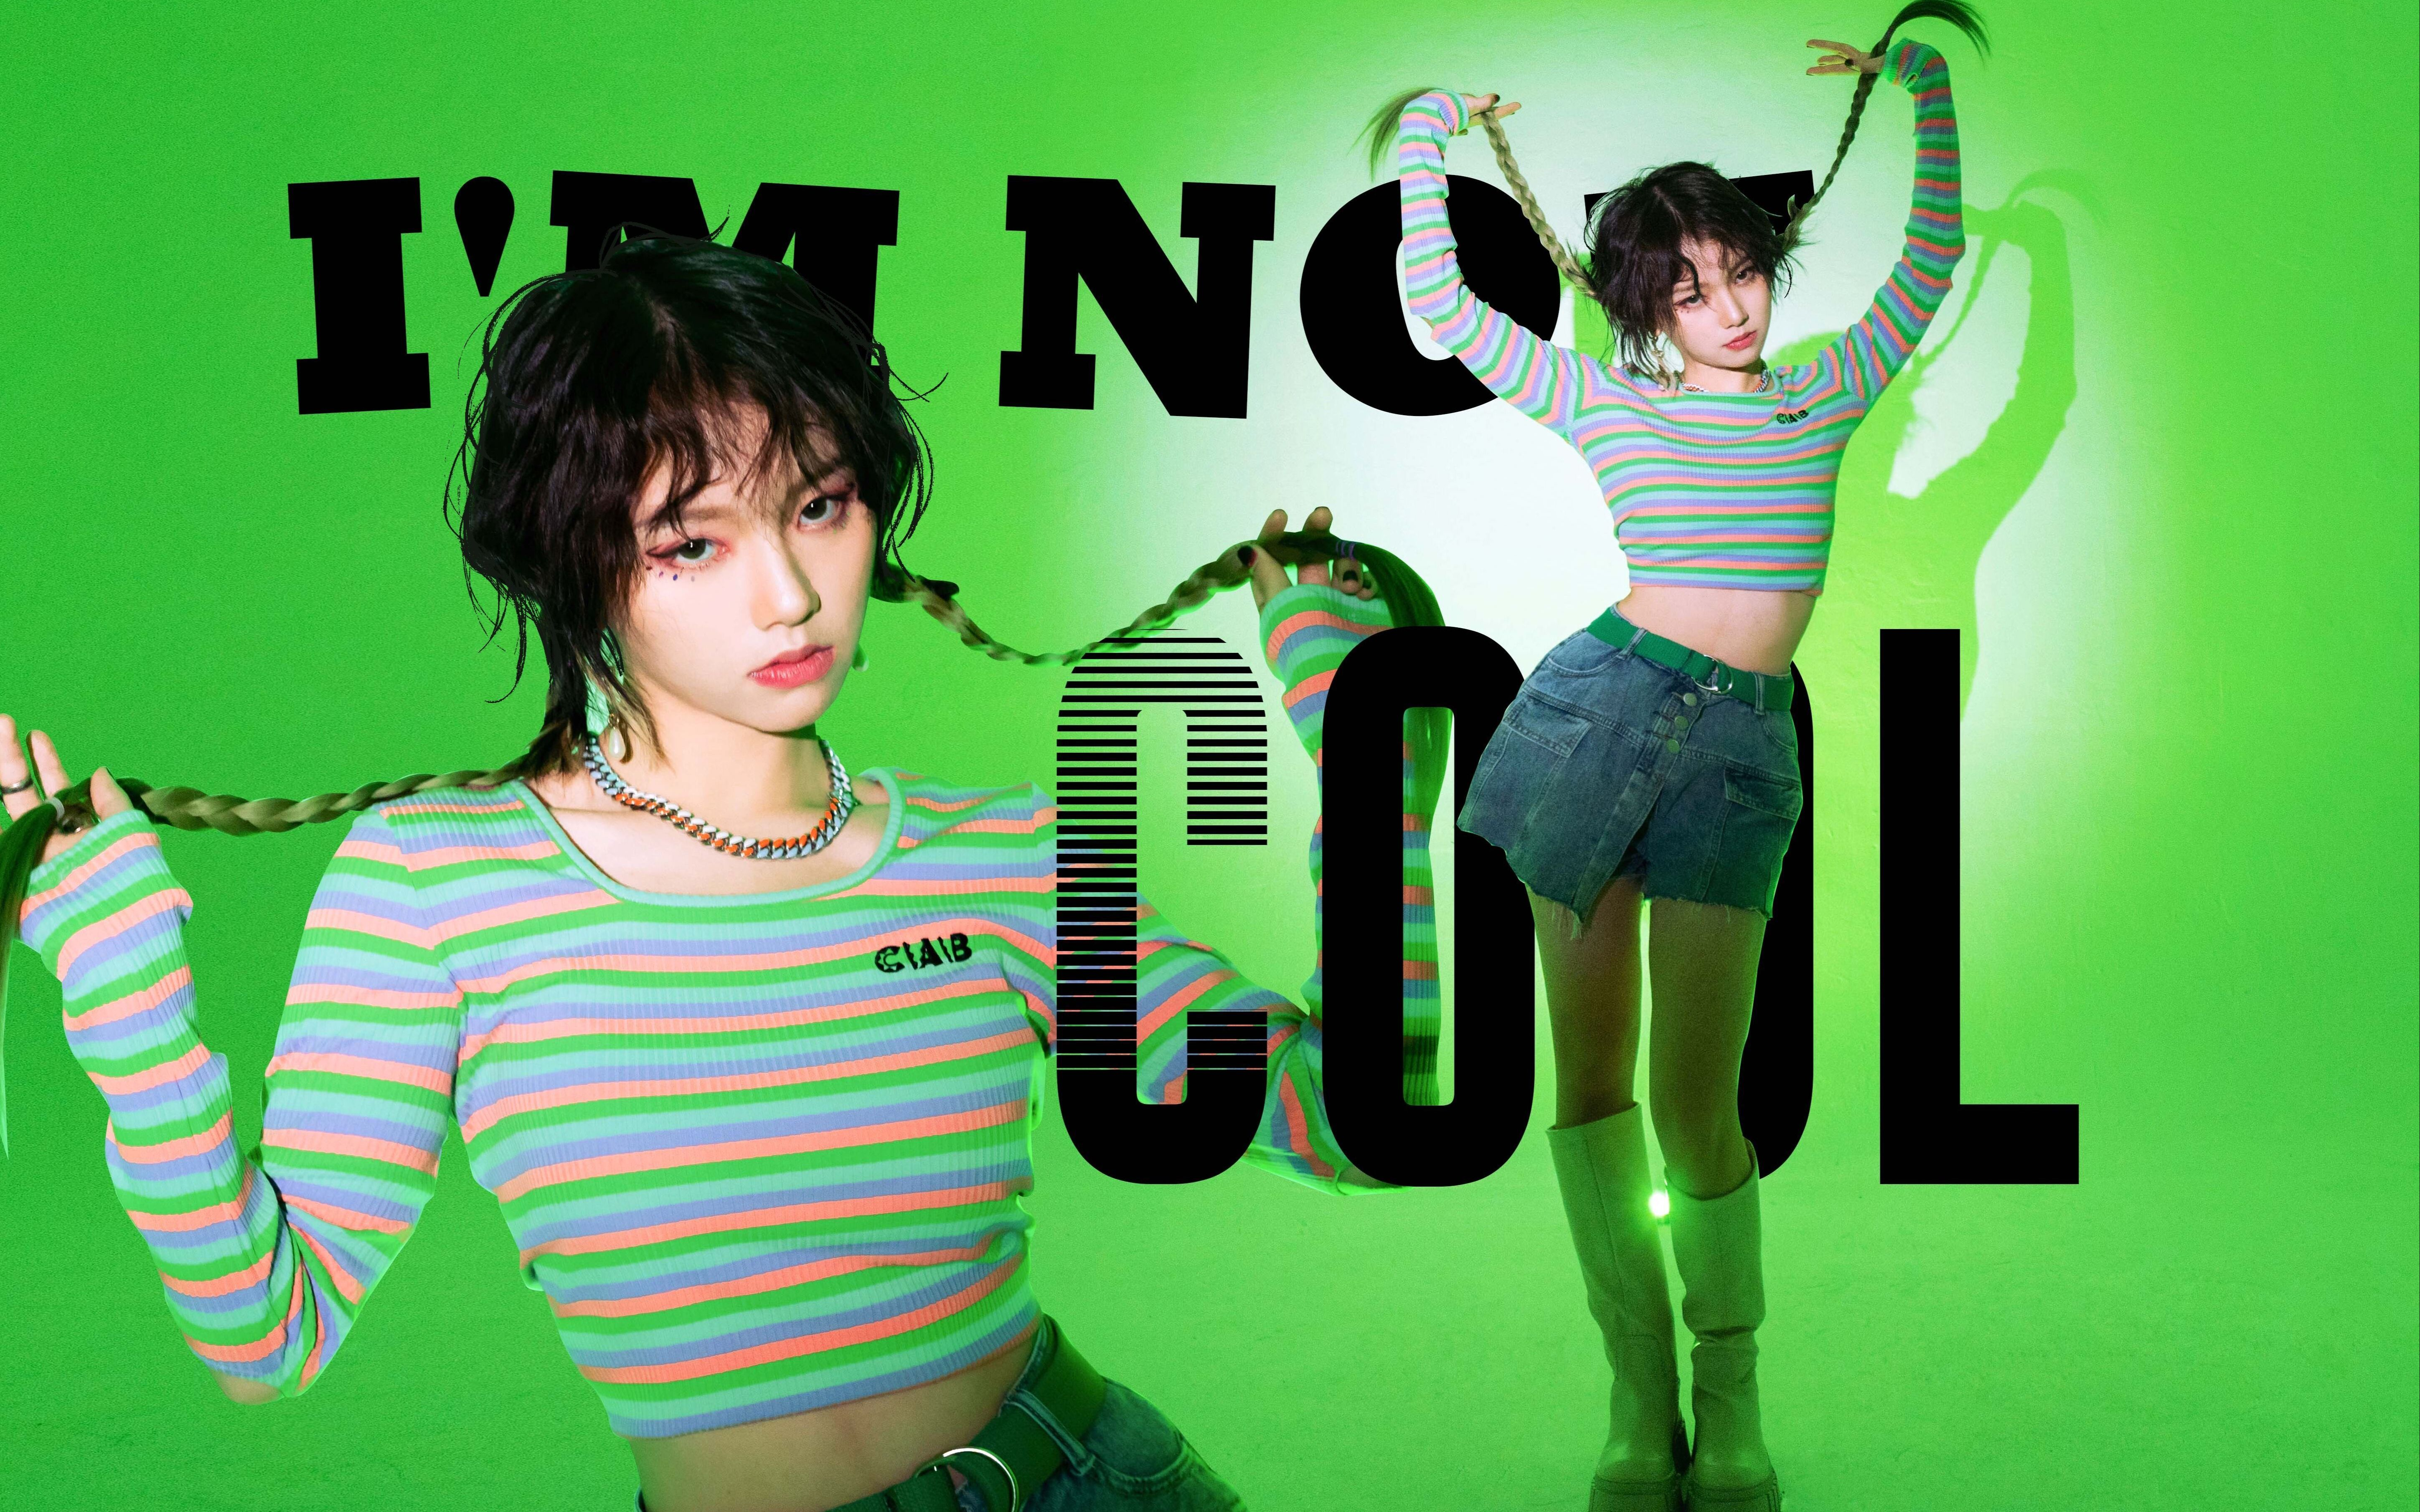

In [44]:
spr = bs.find_all('script')
findjpg = re.compile(r'"pic":"(http:\\u00[\w]F\\u00[\w]Fi[\w].hdslb.com\\u00[\w]Fbfs\\u00[\w]Farchive\\u00[\w]F\w{40}.jpg)')
tempjpg = findjpg.findall(spr[-6].text)
jpg_url = [re.sub(r'\\u00[\d]F','/',onejpg) for onejpg in tempjpg]
print(len(jpg_url))
#保存图片-测试
path = "D://abc.jpg"
jj_url = jpg_url[3]
r = requests.get(jj_url)
with open(path, "wb") as f:
    f.write(r.content)
f.close
display(Image(path))

In [42]:
import json
#dict(spr[-6].text)
rank_page = spr[-6].text
void_front = len('window.__INITIAL_STATE__={"rankList":')
str_end = ',"rankNote"'
#spr[-6].text[void_front:1000]
void_end=rank_page.find(str_end, 0, len(rank_page))
usefulrank=rank_page[void_front: void_end]
usefulrank = usefulrank.replace('false', '"false"')
usefulrank[900:1000]

'1801816,"view":342692,"danmaku":991,"reply":13749,"favorite":112364,"coin":342261,"share":28097,"now'

In [43]:
ranklist = eval(usefulrank)
ranklist[9]

{'aid': 799475609,
 'videos': 1,
 'tid': 154,
 'tname': '舞蹈综合',
 'copyright': 1,
 'pic': 'http://i1.hdslb.com/bfs/archive/6068533068fd4512b244111c48e5ea946498edd2.jpg',
 'title': '【猛男舞团】这曲中国风太上头了！',
 'pubdate': 1614397646,
 'ctime': 1614397646,
 'desc': 'Original MV：《定场白》BV1oy4y1a741\nSinger：谢安然、伢伢gagako、开门啦你的小初快递、吾佟大王 \nComposer：李懋扬(T2o)、纪粹希(G-Tracy)\nDancer:Daneil, Michael, Jawill, Isamu, Maezon, Jorie  \nProduction co-ordinator: NN',
 'state': 0,
 'duration': 129,
 'mission_id': 16242,
 'rights': {'bp': 0,
  'elec': 0,
  'download': 0,
  'movie': 0,
  'pay': 0,
  'hd5': 0,
  'no_reprint': 1,
  'autoplay': 1,
  'ugc_pay': 0,
  'is_cooperation': 0,
  'ugc_pay_preview': 0,
  'no_background': 0},
 'owner': {'mid': 483879799,
  'name': '猛男舞团IconX',
  'face': 'http://i2.hdslb.com/bfs/face/a9888dca151c80d86741063d057f11e7e32dfd99.jpg'},
 'stat': {'aid': 799475609,
  'view': 178521,
  'danmaku': 174,
  'reply': 550,
  'favorite': 1291,
  'coin': 5754,
  'share': 641,
  'now_rank': 0,
  'his